### 7-4．토픽추출을 위한 데이터 준비
#### 전 기사의 형태소 분석

In [1]:
# konlpy의 인스톨
!pip install konlpy

  Using cached konlpy-0.5.2-py2.py3-none-any.whl (19.4 MB)
  Using cached lxml-4.5.0-cp37-cp37m-win_amd64.whl (3.7 MB)
  Using cached JPype1-0.7.2-cp37-cp37m-win_amd64.whl (1.3 MB)
  Using cached tweepy-3.8.0-py2.py3-none-any.whl (28 kB)
  Using cached beautifulsoup4-4.6.0-py3-none-any.whl (86 kB)


In [2]:
# nltk의 인스톨
!pip install nltk

Processing c:\users\fshare\appdata\local\pip\cache\wheels\45\6c\46\a1865e7ba706b3817f5d1b2ff7ce8996aabdd0d03d47ba0266\nltk-3.5-py3-none-any.whl
  Using cached tqdm-4.45.0-py2.py3-none-any.whl (60 kB)
  Using cached regex-2020.4.4-cp37-cp37m-win_amd64.whl (271 kB)


In [3]:
import os
import re
from konlpy.tag import Okt
okt = Okt()

# 기사 폴더의 지정
dirs = ['it-life-hack', 'movie-enter']

# 단어와 레이블을 보존하는 리스트를 생성
docterm = [] # 설명변수
label = [] # 목적변수
tmp1 = []
tmp2 = ''

# 각 폴더의 파일을 하나씩 읽어들여서 표시
for i, d in enumerate(dirs):
    # 파일의 취득
    files = os.listdir('./data/' + d)
    
    for file in files:
        # 파일 오픈과 리드
        f = open('./data/' + d + '/' + file, 'r', encoding='utf-8')
        text = f.read()
        
        # 정규표현으로 불필요한 문자열을 제거하고 표시
        reg_text = re.sub(r'[0-9a-zA-Z]+', '', text)
        reg_text = re.sub(r'[:;/+\.-]', '', reg_text)
        reg_text = re.sub(r'[\s\n]', '', reg_text)
        reg_text = reg_text.replace('\n','')        
        
        # 필터로 형태소 분석
        for token in okt.nouns(reg_text):
            tmp1.append(token)
            tmp2 = ' '.join(tmp1)
        # 기사별로 단어를 보존
        docterm.append(tmp2)
        tmp1 = []
        
        # 기사별로 레이블을 보존
        label.append(i)
        
        # 파일 크로즈
        f.close()

In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
import pandas as pd

# 단어의 TF-IDF를 계산
tv = TfidfVectorizer(min_df=0.05, max_df=0.5)
docterm_tv = tv.fit_transform(np.array(docterm))
docterm_tfidf = docterm_tv.toarray()

# 데이터 프레임 형식으로 선두5행까지 표시
docterm_tfidf = pd.DataFrame(docterm_tfidf)
docterm_tfidf.head()

,0,1,2,3,4,5,6,7,8,9,...,562,563,564,565,566,567,568,569,570,571
0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.057486,0.0,0.0,...,0.000000,0.0,0.0,0.06596,0.000000,0.0,0.0,0.076403,0.0,0.0
1,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.00000,0.000000,0.0,0.0,0.000000,0.0,0.0
2,0.0,0.035539,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.044132,0.0,0.0,0.00000,0.000000,0.0,0.0,0.000000,0.0,0.0
3,0.0,0.000000,0.064138,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.064138,0.0,0.0,0.00000,0.112522,0.0,0.0,0.000000,0.0,0.0
4,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.00000,0.000000,0.0,0.0,0.000000,0.0,0.0


In [5]:
# 데이터 세트에 레이블열을 결합
label = pd.DataFrame(label)
label = label.rename(columns={0:'label'})

docterm_df = pd.concat([docterm_tfidf, label], axis=1)
docterm_df.head()

,0,1,2,3,4,5,6,7,8,9,...,563,564,565,566,567,568,569,570,571,label
0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.057486,0.0,0.0,...,0.0,0.0,0.06596,0.000000,0.0,0.0,0.076403,0.0,0.0,0
1,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.00000,0.000000,0.0,0.0,0.000000,0.0,0.0,0
2,0.0,0.035539,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.00000,0.000000,0.0,0.0,0.000000,0.0,0.0,0
3,0.0,0.000000,0.064138,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.00000,0.112522,0.0,0.0,0.000000,0.0,0.0,0
4,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.00000,0.000000,0.0,0.0,0.000000,0.0,0.0,0


#### 유사도의 계산

In [6]:
from sklearn.metrics.pairwise import cosine_similarity

# label이 0인 단어문서행렬만 선택
docterm_0 = docterm_df[docterm_df['label'] == 0]
docterm_0 = docterm_0.drop('label', axis=1)

# 단어 페어의 코사인 유사도를 계산
sim0 = cosine_similarity(docterm_0.T)
sim0_df = pd.DataFrame(sim0)

# 유사도를 행렬형식으로 확인
sim0_df

,0,1,2,3,4,5,6,7,8,9,...,562,563,564,565,566,567,568,569,570,571
0,1.000000,0.141408,0.104116,0.000000,0.009311,0.000000,0.000000,0.099843,0.000000,0.008391,...,0.000000,0.000000,0.000000,0.186522,0.022011,0.0,0.035551,0.000000,0.083729,0.000000
1,0.141408,1.000000,0.062866,0.000000,0.101792,0.128885,0.061311,0.268409,0.000000,0.155917,...,0.104926,0.000000,0.000000,0.179446,0.113796,0.0,0.184275,0.106287,0.193323,0.079040
2,0.104116,0.062866,1.000000,0.049026,0.000000,0.035460,0.057350,0.076619,0.000000,0.046448,...,0.017823,0.000000,0.000000,0.112102,0.069778,0.0,0.012399,0.014712,0.000000,0.025075
3,0.000000,0.000000,0.049026,1.000000,0.082391,0.074838,0.324744,0.091507,0.000000,0.000000,...,0.147545,0.037859,0.000000,0.072470,0.043957,0.0,0.000000,0.000000,0.000000,0.000000
4,0.009311,0.101792,0.000000,0.082391,1.000000,0.064864,0.000000,0.006031,0.000000,0.009473,...,0.000000,0.131242,0.000000,0.015136,0.109526,0.0,0.042532,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
567,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
568,0.035551,0.184275,0.012399,0.000000,0.042532,0.120151,0.000000,0.043602,0.000000,0.442460,...,0.000000,0.000000,0.000000,0.051116,0.037441,0.0,1.000000,0.039360,0.000000,0.000000
569,0.000000,0.106287,0.014712,0.000000,0.000000,0.230558,0.043875,0.105228,0.017947,0.014756,...,0.195485,0.043520,0.025785,0.206781,0.036000,0.0,0.039360,1.000000,0.000000,0.152729
570,0.083729,0.193323,0.000000,0.000000,0.000000,0.048021,0.000000,0.048749,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.013978,0.009529,0.0,0.000000,0.000000,1.000000,0.000000


#### 동시출현어 리스트의 작성

In [7]:
# 유사도 행렬을 리스트 형식으로 변환
sim0_stack = sim0_df.stack()

# 단어 인덱스와 유사도를 분리
index = pd.Series(sim0_stack.index.values)
value = pd.Series(sim0_stack.values)

print(index.head())
print(value.head())

0    (0, 0)
1    (0, 1)
2    (0, 2)
3    (0, 3)
4    (0, 4)
dtype: object
0    1.000000
1    0.141408
2    0.104116
3    0.000000
4    0.009311
dtype: float64


In [8]:
tmp3 = []
tmp4 = []
for i in range(len(index)):
    # 유사도가 0.5이상 0.9이하인 단어 페어를 추출
    if value[i] >=0.5 and value[i] <= 0.9:
        # 단어 페어를 추출
        tmp1 = str(index[i][0]) + ' ' + str(index[i][1])
        tmp2 = [int(s) for s in tmp1.split()]
        tmp3.append(tmp2)
        # 유사도를 추출
        tmp4 = np.append(tmp4, value[i])

# 동시 출현어 리스트를 작성
tmp3 = pd.DataFrame(tmp3)
tmp3 = tmp3.rename(columns={0:'node1', 1:'node2'})
tmp4 = pd.DataFrame(tmp4)
tmp4 = tmp4.rename(columns={0:'weight'})
sim0_list = pd.concat([tmp3, tmp4], axis=1)

# 작성한 리스트를 확인
sim0_list.head()

,node1,node2,weight
0,0,315,0.557745
1,0,415,0.806134
2,1,143,0.522477
3,1,277,0.608517
4,2,130,0.761323


In [9]:
# 연습문제5
# label이 1인 단어 문서행렬만 선택
docterm_1 = docterm_df[docterm_df['label'] == 1]
docterm_1 = docterm_1.drop('label', axis=1)

# 단어 페어의 코사인 유사도를 계산
sim1 = cosine_similarity(docterm_1.T)
sim1_df = pd.DataFrame(sim1)

# 유사도를 행렬형식으로 확인
sim1_df

,0,1,2,3,4,5,6,7,8,9,...,562,563,564,565,566,567,568,569,570,571
0,1.000000,0.000000,0.148350,0.191087,0.057453,0.022960,0.000000,0.220078,0.054329,0.181650,...,0.076088,0.000000,0.000000,0.000000,0.032315,0.000000,0.015526,0.000000,0.000000,0.094428
1,0.000000,1.000000,0.000000,0.075351,0.133921,0.031064,0.000000,0.030820,0.035375,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.123998,0.112525,0.043856,0.000000
2,0.148350,0.000000,1.000000,0.238951,0.000000,0.005220,0.003880,0.136265,0.042658,0.000000,...,0.000000,0.006205,0.000000,0.000000,0.007348,0.069018,0.032848,0.000000,0.007370,0.000000
3,0.191087,0.075351,0.238951,1.000000,0.171711,0.179447,0.097663,0.148041,0.096522,0.132965,...,0.099789,0.032837,0.032350,0.022189,0.114986,0.101590,0.081628,0.026389,0.140094,0.128508
4,0.057453,0.133921,0.000000,0.171711,1.000000,0.244826,0.175445,0.070080,0.121288,0.084527,...,0.354713,0.155318,0.096432,0.000000,0.091956,0.000000,0.028629,0.046902,0.151271,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
567,0.000000,0.000000,0.069018,0.101590,0.000000,0.146935,0.060094,0.163279,0.061129,0.000000,...,0.000000,0.099991,0.175140,0.068097,0.033445,1.000000,0.076181,0.019795,0.218902,0.029203
568,0.015526,0.123998,0.032848,0.081628,0.028629,0.086077,0.048455,0.042152,0.085231,0.000000,...,0.000000,0.068540,0.165084,0.116465,0.023836,0.076181,1.000000,0.000000,0.020068,0.222647
569,0.000000,0.112525,0.000000,0.026389,0.046902,0.179107,0.000000,0.080225,0.166278,0.000000,...,0.000000,0.041164,0.000000,0.312502,0.000000,0.019795,0.000000,1.000000,0.066585,0.304150
570,0.000000,0.043856,0.007370,0.140094,0.151271,0.190101,0.175752,0.063254,0.041775,0.017490,...,0.000000,0.003391,0.000000,0.000000,0.004016,0.218902,0.020068,0.066585,1.000000,0.080791


In [10]:
# 연습문제6
# 유사도 행렬을 리스트형식으로 변환
sim1_stack = sim1_df.stack()

# 단어 인덱스와 유사도를 분리
index = pd.Series(sim1_stack.index.values)
value = pd.Series(sim1_stack.values)

print(index.head())
print(value.head())

0    (0, 0)
1    (0, 1)
2    (0, 2)
3    (0, 3)
4    (0, 4)
dtype: object
0    1.000000
1    0.000000
2    0.148350
3    0.191087
4    0.057453
dtype: float64


In [11]:
# 연습문제 6
tmp3 = []
tmp4 = []
for i in range(len(index)):
    # 유사도가 0.5이상 0.9이하인 단어 페어를 추출
    if value[i] >=0.5 and value[i] <= 0.9:
        # 단어 페어를 추출
        tmp1 = str(index[i][0]) + ' ' + str(index[i][1])
        tmp2 = [int(s) for s in tmp1.split()]
        tmp3.append(tmp2)
        # 유사도를 추출
        tmp4 = np.append(tmp4, value[i])

# 동시 출현어 리스트를 작성
tmp3 = pd.DataFrame(tmp3)
tmp3 = tmp3.rename(columns={0:'node1', 1:'node2'})
tmp4 = pd.DataFrame(tmp4)
tmp4 = tmp4.rename(columns={0:'weight'})
sim1_list = pd.concat([tmp3, tmp4], axis=1)

# 작성한 리스트를 확인
sim1_list.head()

,node1,node2,weight
0,1,239,0.552359
1,2,386,0.505525
2,2,533,0.504504
3,7,168,0.548772
4,10,325,0.522079


In [10]:
sim1_list.to_csv('sim1_list.csv', index=False)

##### === 모델의 작성은 여기서부터 ======================

In [10]:
import networkx as nx

# 무방향 네트워크의 작성
G_corlist = nx.from_pandas_edgelist(sim1_list, 'node1', 'node2', ['weight'], nx.Graph)

print(G_corlist.nodes()) # 노드의 확인
print(G_corlist.edges(data=True)) # 엣지의 확인

[2, 497, 3, 89, 4, 383, 446, 5, 155, 7, 163, 218, 221, 12, 457, 13, 267, 19, 25, 38, 397, 433, 493, 26, 484, 27, 391, 28, 341, 35, 36, 368, 39, 272, 40, 242, 44, 275, 45, 194, 334, 440, 46, 88, 127, 50, 157, 51, 87, 131, 277, 402, 53, 146, 55, 114, 56, 111, 343, 57, 67, 202, 58, 468, 59, 61, 137, 314, 62, 117, 133, 251, 403, 64, 96, 66, 144, 187, 214, 416, 69, 165, 71, 220, 72, 212, 274, 453, 502, 73, 237, 80, 119, 84, 283, 305, 371, 90, 93, 196, 324, 472, 478, 97, 173, 100, 455, 102, 439, 106, 265, 109, 128, 115, 337, 116, 404, 168, 189, 199, 252, 125, 462, 366, 129, 300, 388, 135, 405, 136, 142, 140, 301, 141, 209, 408, 167, 207, 150, 477, 152, 327, 480, 158, 302, 308, 160, 162, 378, 336, 164, 450, 172, 489, 179, 180, 182, 213, 320, 192, 414, 280, 323, 365, 470, 195, 348, 240, 243, 331, 421, 197, 330, 469, 200, 247, 204, 250, 358, 411, 486, 349, 413, 351, 233, 376, 234, 309, 236, 281, 244, 344, 260, 263, 491, 266, 401, 276, 459, 285, 313, 347, 500, 326, 352, 333, 409, 342, 452, 441, 

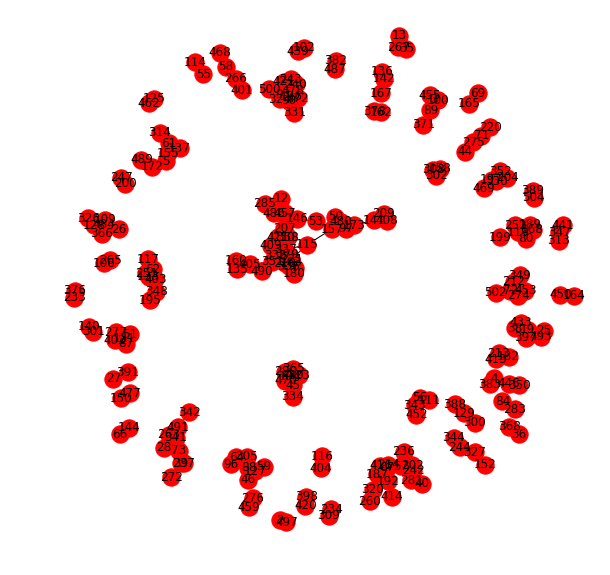

In [15]:
# 작성한 네트워크를 가시화
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(10,10))
pos = nx.spring_layout(G_corlist) # 레이아웃의 설정
nx.draw_networkx(G_corlist, pos)
plt.axis('off')
plt.show()

In [16]:
# 평균 클러스터계수의 계산
print(nx.average_clustering(G_corlist))

# 매게중심성의 계산
bc = nx.betweenness_centrality(G_corlist)

for k, v in sorted(bc.items(), key=lambda x: -x[1]):
    print(str(k) + ': ' + str(v))

0.18253660203201486
337: 0.011421175399670025
157: 0.008747226489161975
115: 0.006990669625078227
351: 0.005077658303464756
207: 0.004935426978437732
221: 0.0039540308357512675
173: 0.0038402457757296467
405: 0.002688172043010753
141: 0.002688172043010753
146: 0.0018418956590999598
457: 0.0016783296353188825
53: 0.0016712180690675313
196: 0.00136542072025943
486: 0.00136542072025943
67: 0.0004906980713432327
341: 0.00046936337258917906
218: 0.00043380554133242295
19: 0.0004266939750810719
187: 0.0004266939750810719
72: 0.00038402457757296467
119: 0.00038402457757296467
324: 0.00038402457757296467
403: 0.0003413551800648575
194: 0.00029868578255675033
440: 0.00029868578255675033
336: 0.00029868578255675033
45: 0.0002560163850486431
57: 0.0002560163850486431
320: 0.0002560163850486431
51: 0.00021334698754053595
61: 0.00021334698754053595
62: 0.00021334698754053595
73: 0.00021334698754053595
348: 0.00021334698754053595
330: 0.00021334698754053595
491: 0.00021334698754053595
163: 0.0001849

In [17]:
print(tv.get_feature_names()[337])
print(tv.get_feature_names()[157])
print(tv.get_feature_names()[115])
print(tv.get_feature_names()[351])
print(tv.get_feature_names()[207])

映画
ランキング
ニュース
月日
作品


In [20]:
from networkx.algorithms.community import greedy_modularity_communities

# 커뮤니티 추출
cm_corlist = list(greedy_modularity_communities(G_corlist))

# 각 커뮤니티에 속한 노드를 표시
cm_corlist

[frozenset({12, 53, 146, 207, 250, 285, 333, 337, 358, 409, 411, 457, 486}),
 frozenset({7, 135, 160, 163, 179, 180, 218, 221, 336, 351, 405, 490}),
 frozenset({90, 93, 196, 240, 243, 324, 331, 421, 472, 478, 500}),
 frozenset({50, 97, 115, 141, 157, 173, 209, 408, 480}),
 frozenset({45, 194, 280, 323, 334, 365, 440, 470}),
 frozenset({57, 67, 187, 202, 214, 260, 320, 416}),
 frozenset({62, 117, 133, 195, 251, 348, 403}),
 frozenset({28, 73, 237, 263, 341, 342, 491}),
 frozenset({19, 25, 38, 397, 433, 493}),
 frozenset({80, 119, 168, 189, 199, 252}),
 frozenset({72, 212, 274, 349, 453, 502}),
 frozenset({51, 87, 131, 277, 402}),
 frozenset({5, 61, 137, 155, 314}),
 frozenset({46, 59, 88, 127, 305}),
 frozenset({197, 204, 330, 352, 469}),
 frozenset({40, 236, 242, 281}),
 frozenset({56, 111, 343, 452}),
 frozenset({4, 350, 383, 446}),
 frozenset({13, 35, 267}),
 frozenset({3, 89, 371}),
 frozenset({109, 128, 366}),
 frozenset({129, 300, 388}),
 frozenset({136, 142, 167}),
 frozenset({15

##### === 모델의 작성은 여기까지 ======================